In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/scratch/user/xiliangdiao/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.EVAP_F.nc')

In [3]:
plotvar3 = data.variables['EVAP_F']

In [5]:
#pl = plotvar3[:,224:343,600:1400]
pl = plotvar3[:,247:365,700:1300]

In [6]:
plot1 = np.nanmean(pl, axis = 1)
aveplotnew = np.nanmean(plot1,axis=1)

In [7]:
aveplotnew.shape

(96,)

In [8]:
d2 = aveplotnew.reshape(8,12)

In [9]:
d2mean = np.nanmean(d2,axis=1)

In [10]:
d2mean

masked_array(data=[-7.2444313e-06, -8.6129994e-06, -7.8041603e-06,
                   -8.1511162e-06, -7.7880131e-06, -8.8432653e-06,
                   -7.8750209e-06, -6.5402569e-06],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [11]:
#np.savetxt('gapdata.npy', aveplotnew)

In [12]:
lal2 = np.loadtxt("dmeanEvaporation.out")

In [13]:
lal2.shape

(350,)

In [42]:
mean = np.nanmean(lal2)

In [43]:
uu1 = lal2[:179]

In [44]:
uu2 = lal2[187:350]

In [45]:
lal = np.hstack((uu1,d2mean))

In [46]:
lal3 = np.hstack((lal,uu2))

In [47]:
lal3.shape

(350,)

In [48]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

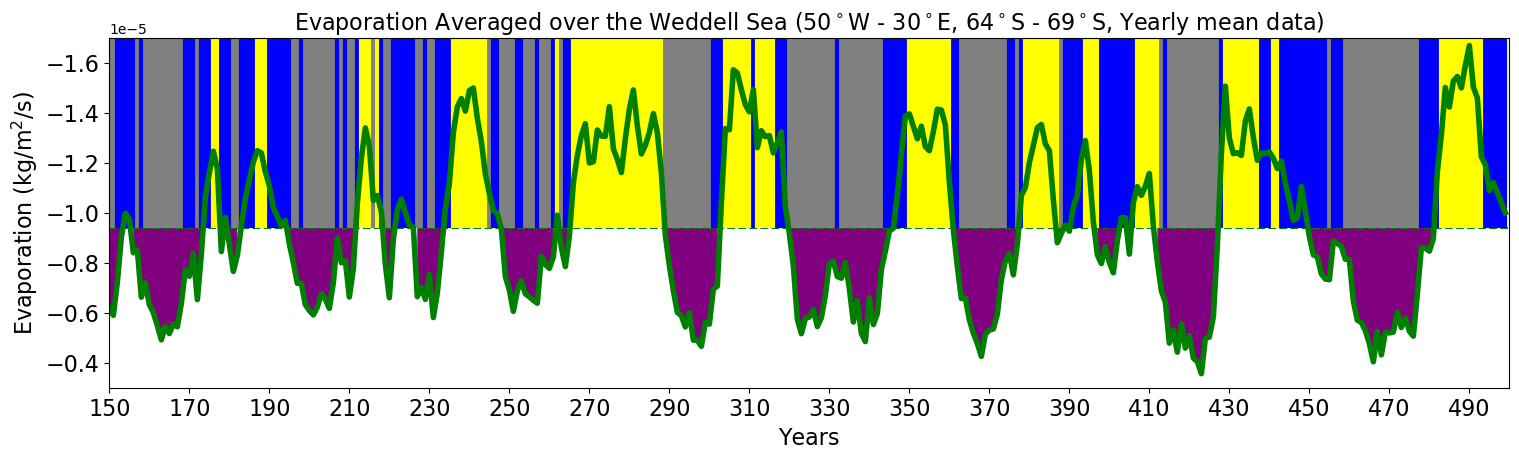

In [49]:
t = np.arange(0,350,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(lal3,'green',linewidth=4)
ax0.fill_between(t,mean,lal3,where=lal3 > mean,facecolor='purple', alpha=1)
plt.hlines(mean, 0, 350, colors = "green",linestyles = "dashed")
plt.vlines(noxx, mean, -0.00002,colors = "grey",linewidth=3)
plt.vlines(mrpxx, mean, -0.00002, colors = "blue",linewidth=3)
plt.vlines(wspxx, mean, -0.00002, colors = "yellow",linewidth=3)
#plt.axhspan(std,0.000005,facecolor='yellow', alpha=1)
#plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
#plt.axhspan(-0.000003,-std,facecolor='lightgreen', alpha=1)
#plt.xticks(range(0,3720,240), ['150','170',\
                            #'190','210','230', '250', '270','290','310','330'],**my_font)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Evaporation (kg/m$^2$/s)',**my_font)
plt.axis("tight")
ax0.set(ylim=(-0.000003, -0.000017),xlim=(0, 350))
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax0.set_title('Evaporation Averaged over the Weddell Sea (50$^\circ$W - 30$^\circ$E, 64$^\circ$S - 69$^\circ$S, Yearly mean data)',**my_font)
plt.savefig("Evaporation.png",bbox_inches='tight',dpi=fig.dpi)

In [50]:
np.savetxt('Eva88.out', lal3)

In [51]:
pre = np.loadtxt("ddd.out")

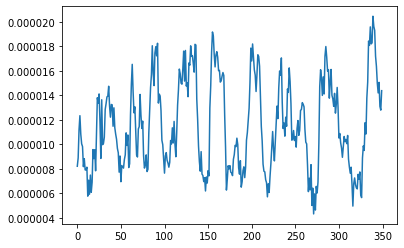

In [52]:
plt.plot(pre)

In [53]:
fin = lal3 + pre

In [54]:
finmean = np.nanmean(fin)

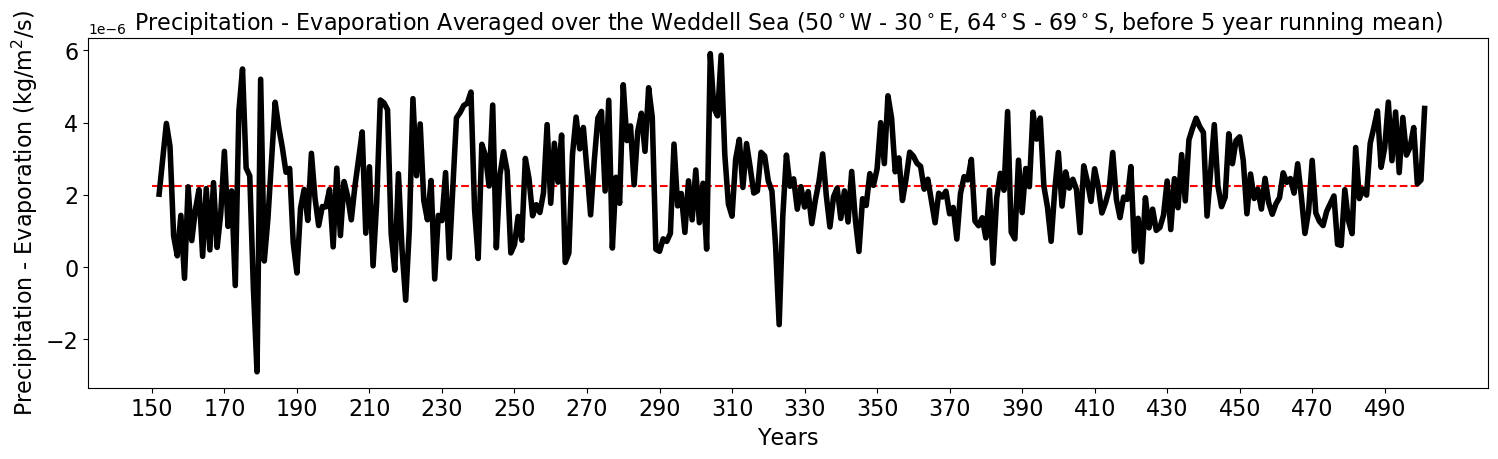

In [55]:
t = np.arange(2,352,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])

ax0.plot(t,fin,'k',linewidth=4)
#ax0.fill_between(t,ww2,mean,where=mean > ww2,facecolor='green', alpha=1)
plt.hlines(finmean, 0, 350, colors = "red",linestyles = "dashed")
#plt.vlines(noxx, 0, 0.000005,colors = "grey",linewidth=3)
#plt.vlines(mrpxx, 0, 0.000005, colors = "blue",linewidth=3)
#plt.vlines(wspxx, 0, 0.000005, colors = "yellow",linewidth=3)
#plt.axhspan(std,0.000005,facecolor='yellow', alpha=1)
#plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
#plt.axhspan(-0.000003,-std,facecolor='lightgreen', alpha=1)
#plt.xticks(range(0,3720,240), ['150','170',\
                            #'190','210','230', '250', '270','290','310','330'],**my_font)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Precipitation - Evaporation (kg/m$^2$/s)',**my_font)
plt.axis("tight")
#ax0.set(ylim=(0, 0.000005),xlim=(0, 350))
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax0.set_title('Precipitation - Evaporation Averaged over the Weddell Sea (50$^\circ$W - 30$^\circ$E, 64$^\circ$S - 69$^\circ$S, before 5 year running mean)',**my_font)
plt.savefig("try",bbox_inches='tight',dpi=fig.dpi)
plt.savefig("before 5 year running mean",bbox_inches='tight',dpi=fig.dpi)

In [56]:
ww2 = np.convolve(fin, np.ones((5,))/5, mode='valid')
mean = np.nanmean(ww2)

In [57]:
#ww2 = ww2*3600*24*100/997
#mean = mean*3600*24*100/997

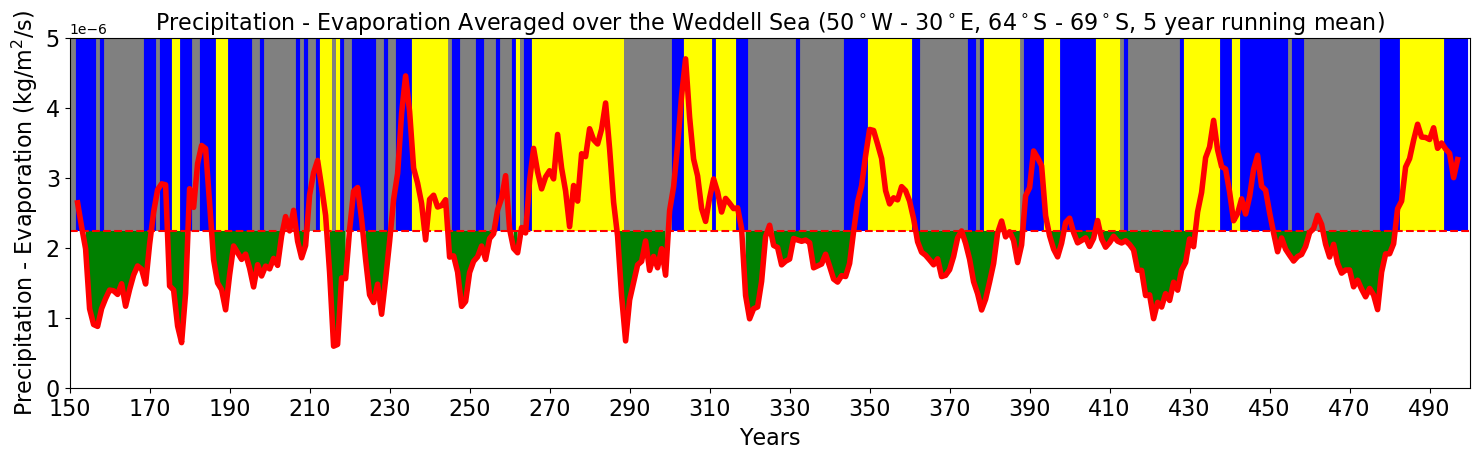

In [58]:
t = np.arange(2,348,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
plt.vlines(noxx, mean, 0.000005,colors = "grey",linewidth=3)
plt.vlines(mrpxx, mean, 0.000005, colors = "blue",linewidth=3)
plt.vlines(wspxx, mean, 0.000005, colors = "yellow",linewidth=3)
ax0.plot(t,ww2,'red',linewidth=4)
ax0.fill_between(t,ww2,mean,where=mean > ww2,facecolor='green', alpha=1)
plt.hlines(mean, 0, 350, colors = "red",linestyles = "dashed")
#plt.vlines(noxx, 0, 0.000005,colors = "grey",linewidth=3)
#plt.vlines(mrpxx, 0, 0.000005, colors = "blue",linewidth=3)
#plt.vlines(wspxx, 0, 0.000005, colors = "yellow",linewidth=3)
#plt.axhspan(std,0.000005,facecolor='yellow', alpha=1)
#plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
#plt.axhspan(-0.000003,-std,facecolor='lightgreen', alpha=1)
#plt.xticks(range(0,3720,240), ['150','170',\
                            #'190','210','230', '250', '270','290','310','330'],**my_font)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Precipitation - Evaporation (kg/m$^2$/s)',**my_font)
plt.axis("tight")
ax0.set(ylim=(0, 0.000005),xlim=(0, 350))
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax0.set_title('Precipitation - Evaporation Averaged over the Weddell Sea (50$^\circ$W - 30$^\circ$E, 64$^\circ$S - 69$^\circ$S, 5 year running mean)',**my_font)
plt.savefig("Precipitation - Evaporation",bbox_inches='tight',dpi=fig.dpi)

In [59]:
np.savetxt('P-E.out', ww2)

In [60]:
3600*24*100/997

8665.997993981946

In [61]:
ww2 = ww2*3600*24*100/997
mean = mean*3600*24*100/997

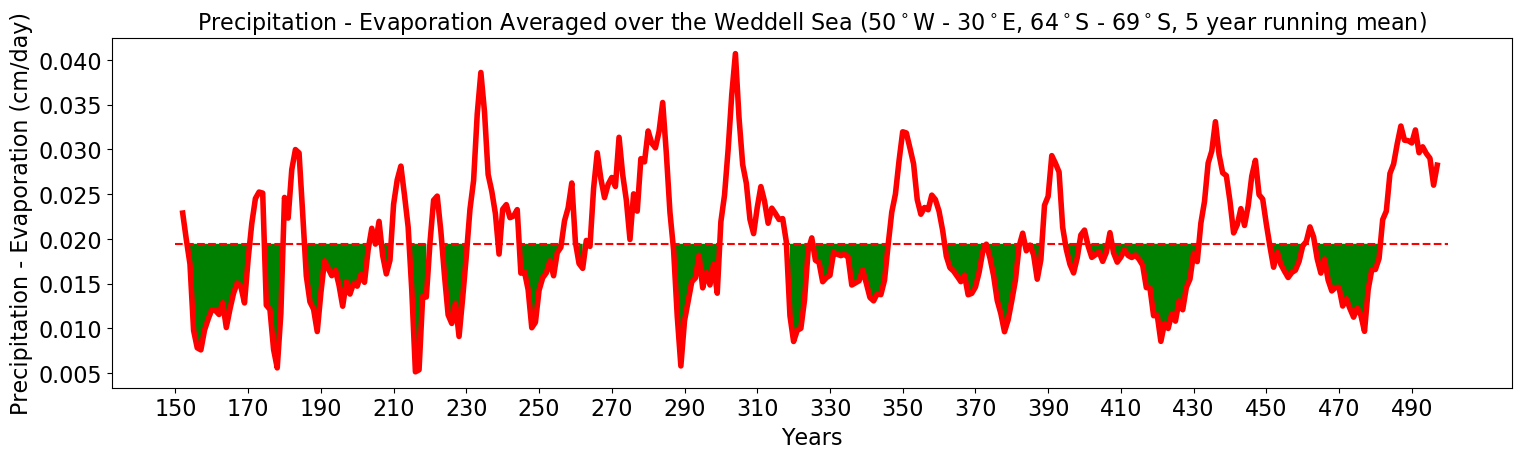

In [64]:
t = np.arange(2,348,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
#plt.vlines(noxx, mean, 0.000005,colors = "grey",linewidth=3)
#plt.vlines(mrpxx, mean, 0.000005, colors = "blue",linewidth=3)
#plt.vlines(wspxx, mean, 0.000005, colors = "yellow",linewidth=3)
ax0.plot(t,ww2,'red',linewidth=4)
ax0.fill_between(t,ww2,mean,where=mean > ww2,facecolor='green', alpha=1)
plt.hlines(mean, 0, 350, colors = "red",linestyles = "dashed")
#plt.vlines(noxx, 0, 0.000005,colors = "grey",linewidth=3)
#plt.vlines(mrpxx, 0, 0.000005, colors = "blue",linewidth=3)
#plt.vlines(wspxx, 0, 0.000005, colors = "yellow",linewidth=3)
#plt.axhspan(std,0.000005,facecolor='yellow', alpha=1)
#plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
#plt.axhspan(-0.000003,-std,facecolor='lightgreen', alpha=1)
#plt.xticks(range(0,3720,240), ['150','170',\
                            #'190','210','230', '250', '270','290','310','330'],**my_font)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Precipitation - Evaporation (cm/day)',**my_font)
plt.axis("tight")
#ax0.set(ylim=(0, 0.000005),xlim=(0, 350))
ax = plt.gca()
#ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax0.set_title('Precipitation - Evaporation Averaged over the Weddell Sea (50$^\circ$W - 30$^\circ$E, 64$^\circ$S - 69$^\circ$S, 5 year running mean)',**my_font)
plt.savefig("Precipitation - Evaporation unit new",bbox_inches='tight',dpi=fig.dpi)